### İMPORTS

In [227]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 

from collections import Counter
import warnings
warnings.filterwarnings("ignore")

### DATA LOADING

In [229]:
df = pd.read_csv("KNNAlgorithmDataset.csv")

### Data Exploration 

In [231]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [232]:
df.info()
#i have null columns without it there are 32 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [233]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [234]:
df.isna().any().sum()

1

In [235]:
df["Unnamed: 32"].isna().any()

True

In [236]:
df.shape

(569, 33)

In [237]:
df=df.drop("Unnamed: 32",axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [238]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [239]:
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

### Data Visualization

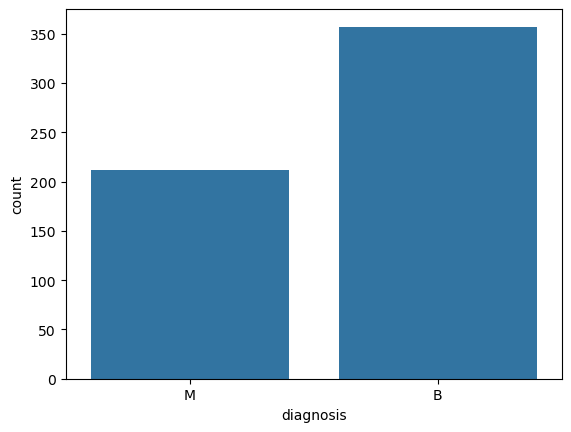

In [241]:
plt.figure()
sns.countplot(data=df,x="diagnosis")
plt.show()

In [242]:
df.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

<Figure size 300x300 with 0 Axes>

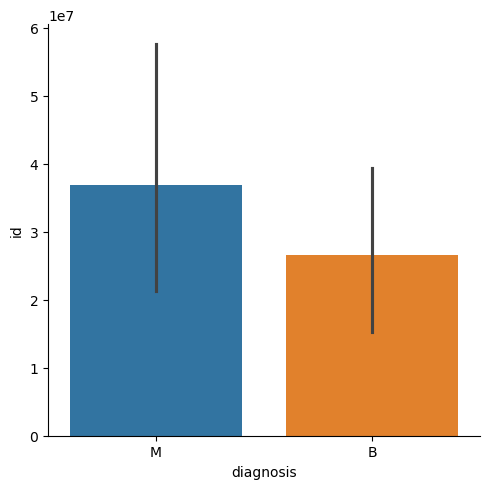

<Figure size 300x300 with 0 Axes>

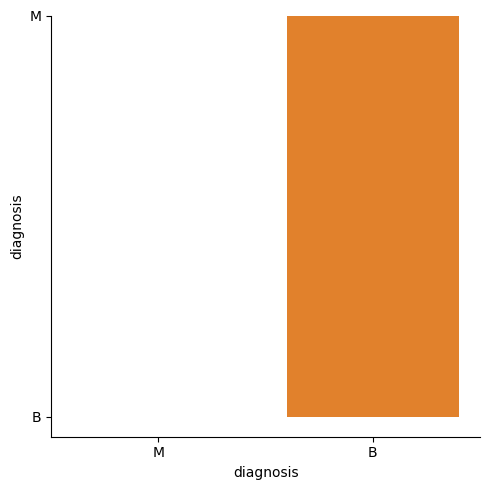

<Figure size 300x300 with 0 Axes>

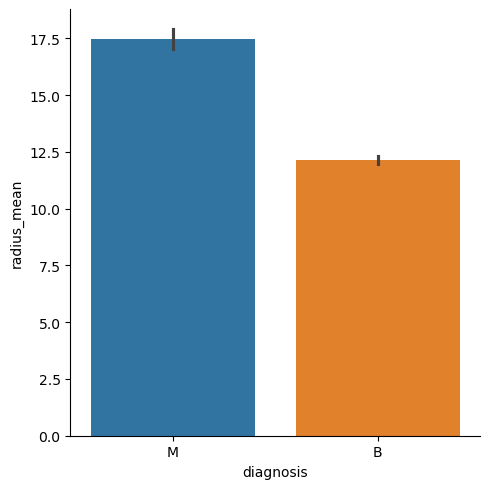

<Figure size 300x300 with 0 Axes>

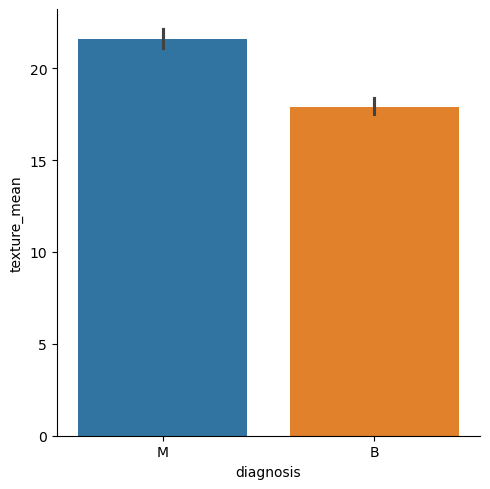

<Figure size 300x300 with 0 Axes>

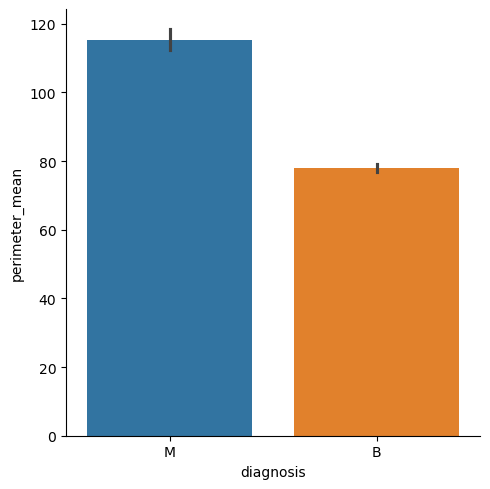

<Figure size 300x300 with 0 Axes>

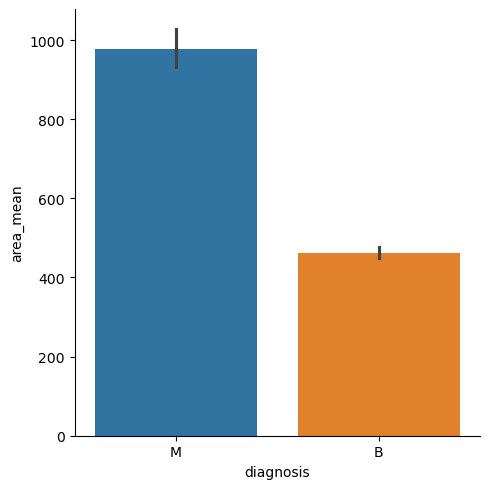

<Figure size 300x300 with 0 Axes>

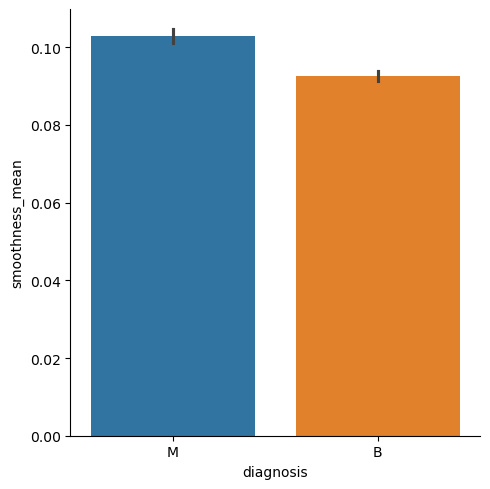

<Figure size 300x300 with 0 Axes>

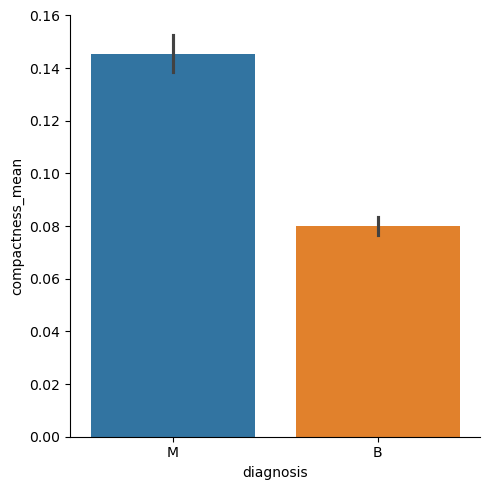

<Figure size 300x300 with 0 Axes>

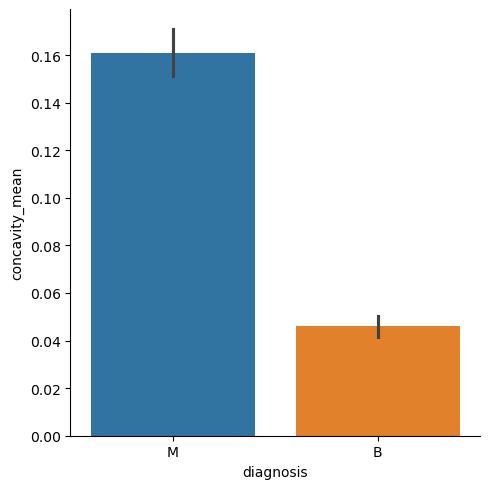

<Figure size 300x300 with 0 Axes>

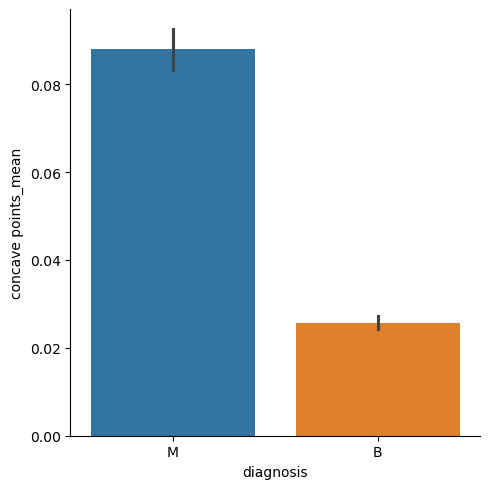

<Figure size 300x300 with 0 Axes>

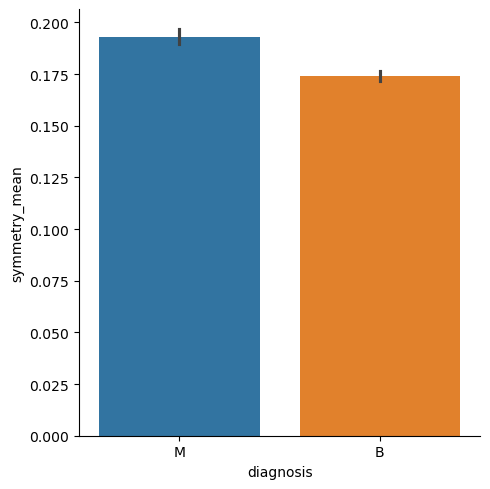

<Figure size 300x300 with 0 Axes>

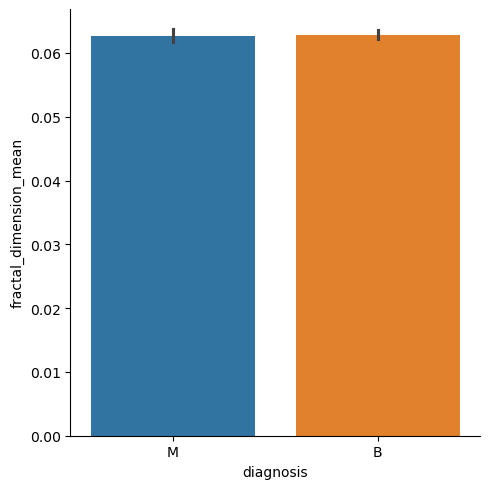

<Figure size 300x300 with 0 Axes>

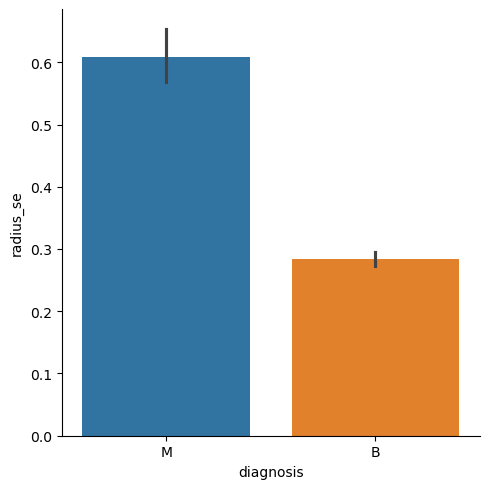

<Figure size 300x300 with 0 Axes>

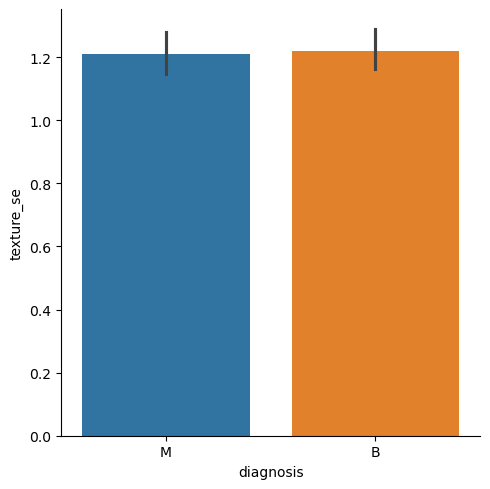

<Figure size 300x300 with 0 Axes>

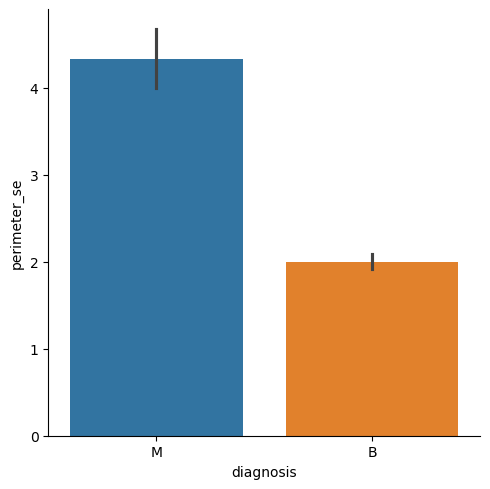

<Figure size 300x300 with 0 Axes>

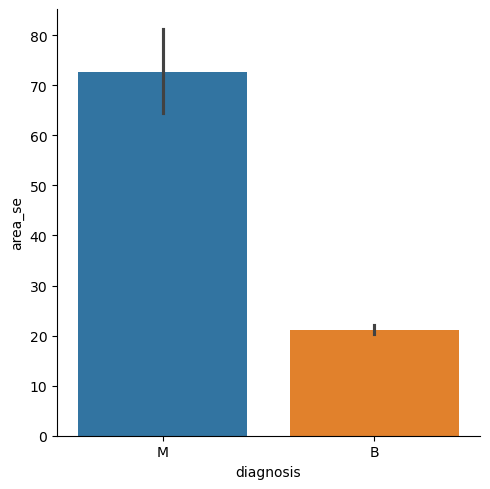

<Figure size 300x300 with 0 Axes>

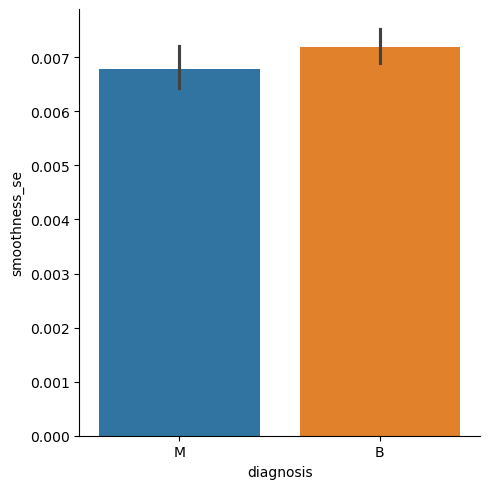

<Figure size 300x300 with 0 Axes>

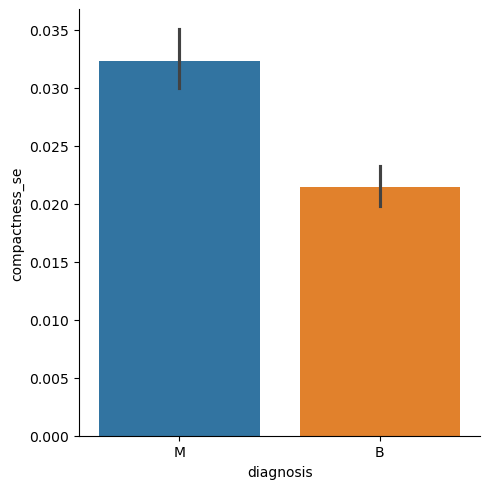

<Figure size 300x300 with 0 Axes>

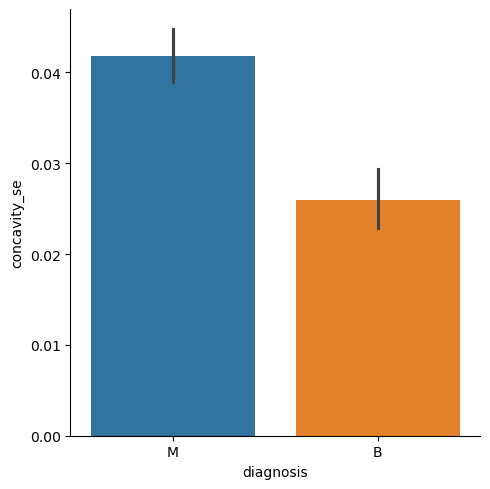

<Figure size 300x300 with 0 Axes>

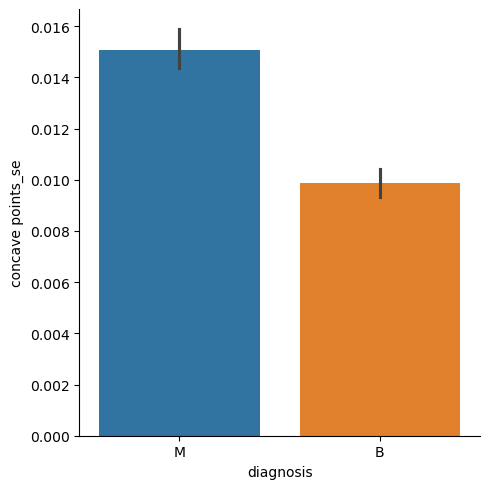

<Figure size 300x300 with 0 Axes>

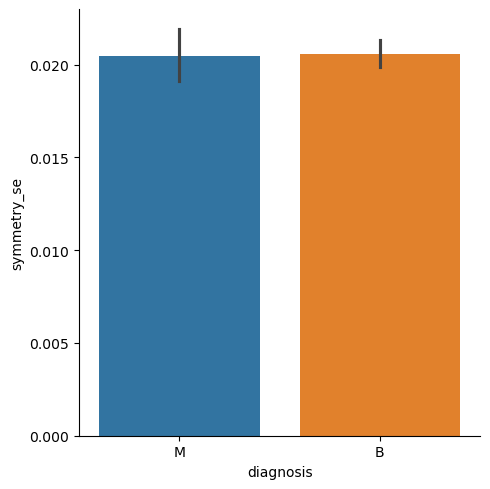

<Figure size 300x300 with 0 Axes>

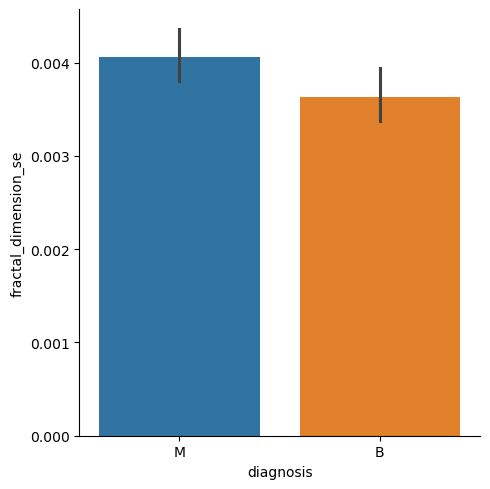

<Figure size 300x300 with 0 Axes>

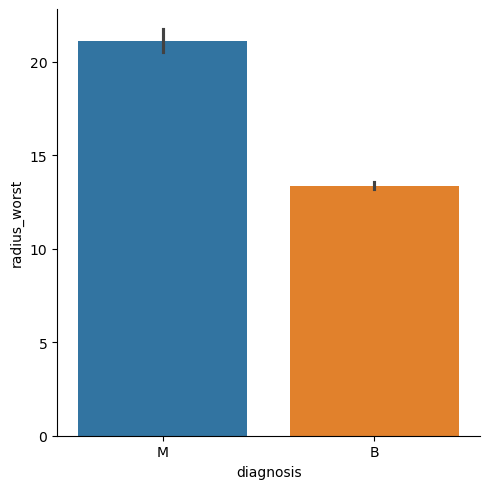

<Figure size 300x300 with 0 Axes>

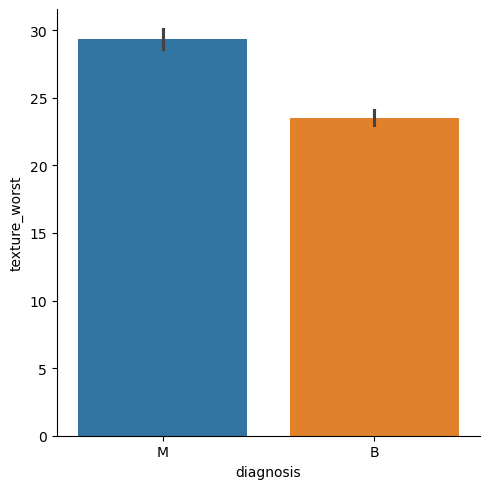

<Figure size 300x300 with 0 Axes>

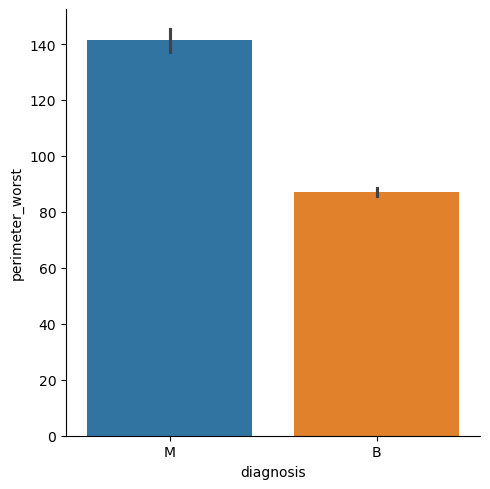

<Figure size 300x300 with 0 Axes>

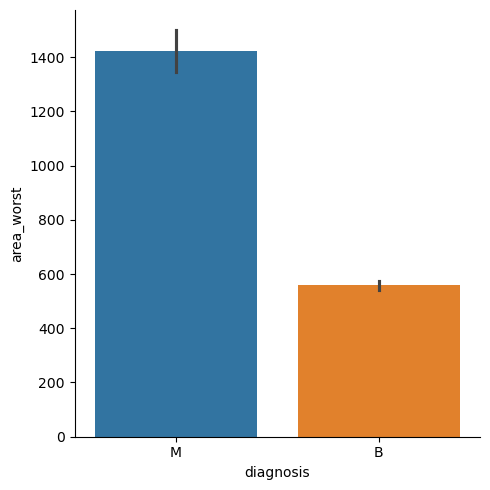

<Figure size 300x300 with 0 Axes>

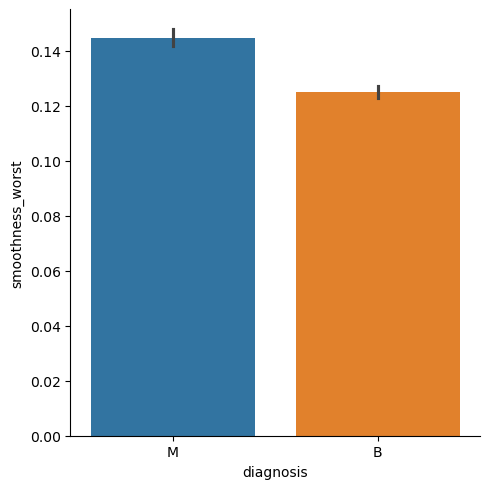

<Figure size 300x300 with 0 Axes>

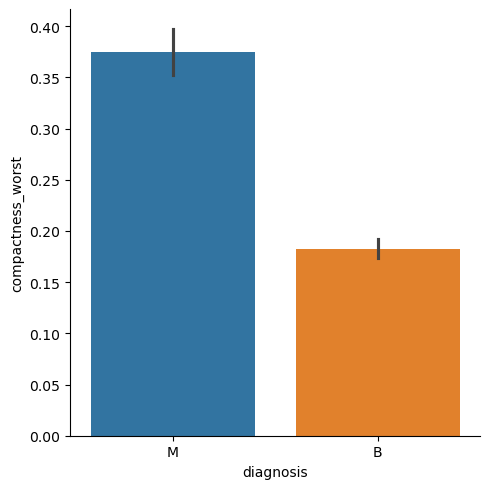

<Figure size 300x300 with 0 Axes>

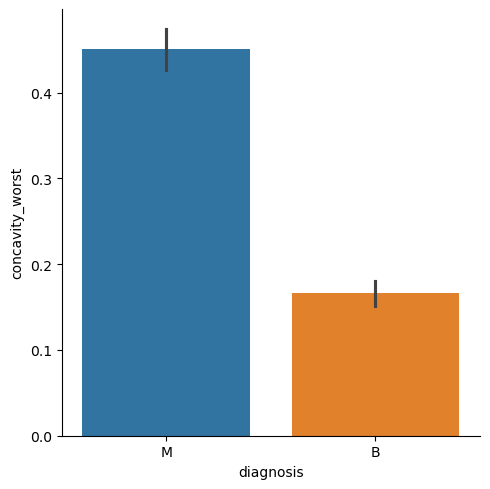

<Figure size 300x300 with 0 Axes>

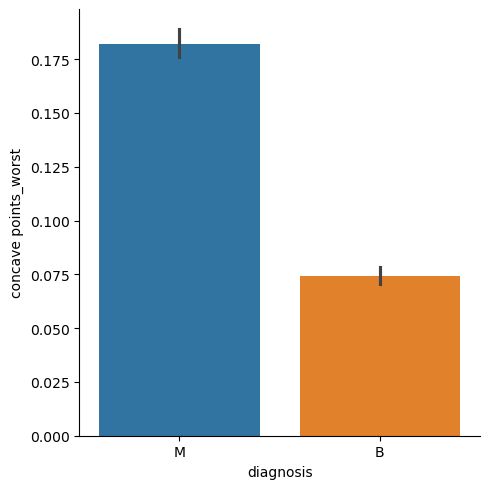

<Figure size 300x300 with 0 Axes>

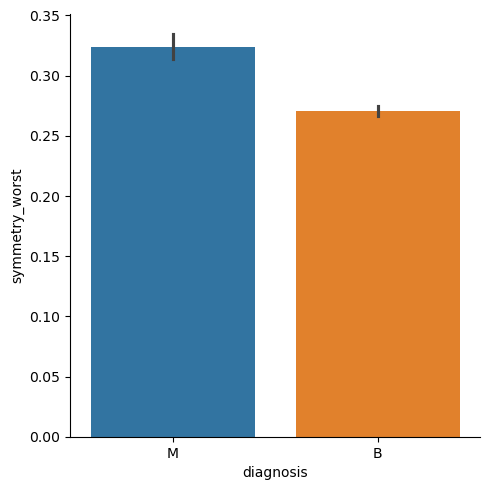

<Figure size 300x300 with 0 Axes>

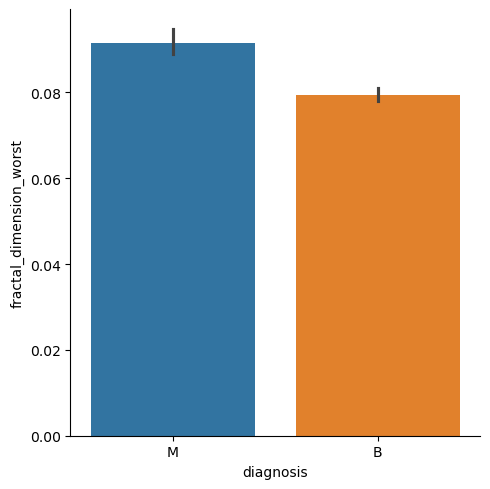

In [243]:
for column in df.columns:
    plt.figure(figsize=(3,3))
    sns.catplot(x="diagnosis", y=column, hue="diagnosis", data=df, kind="bar")
    plt.show()

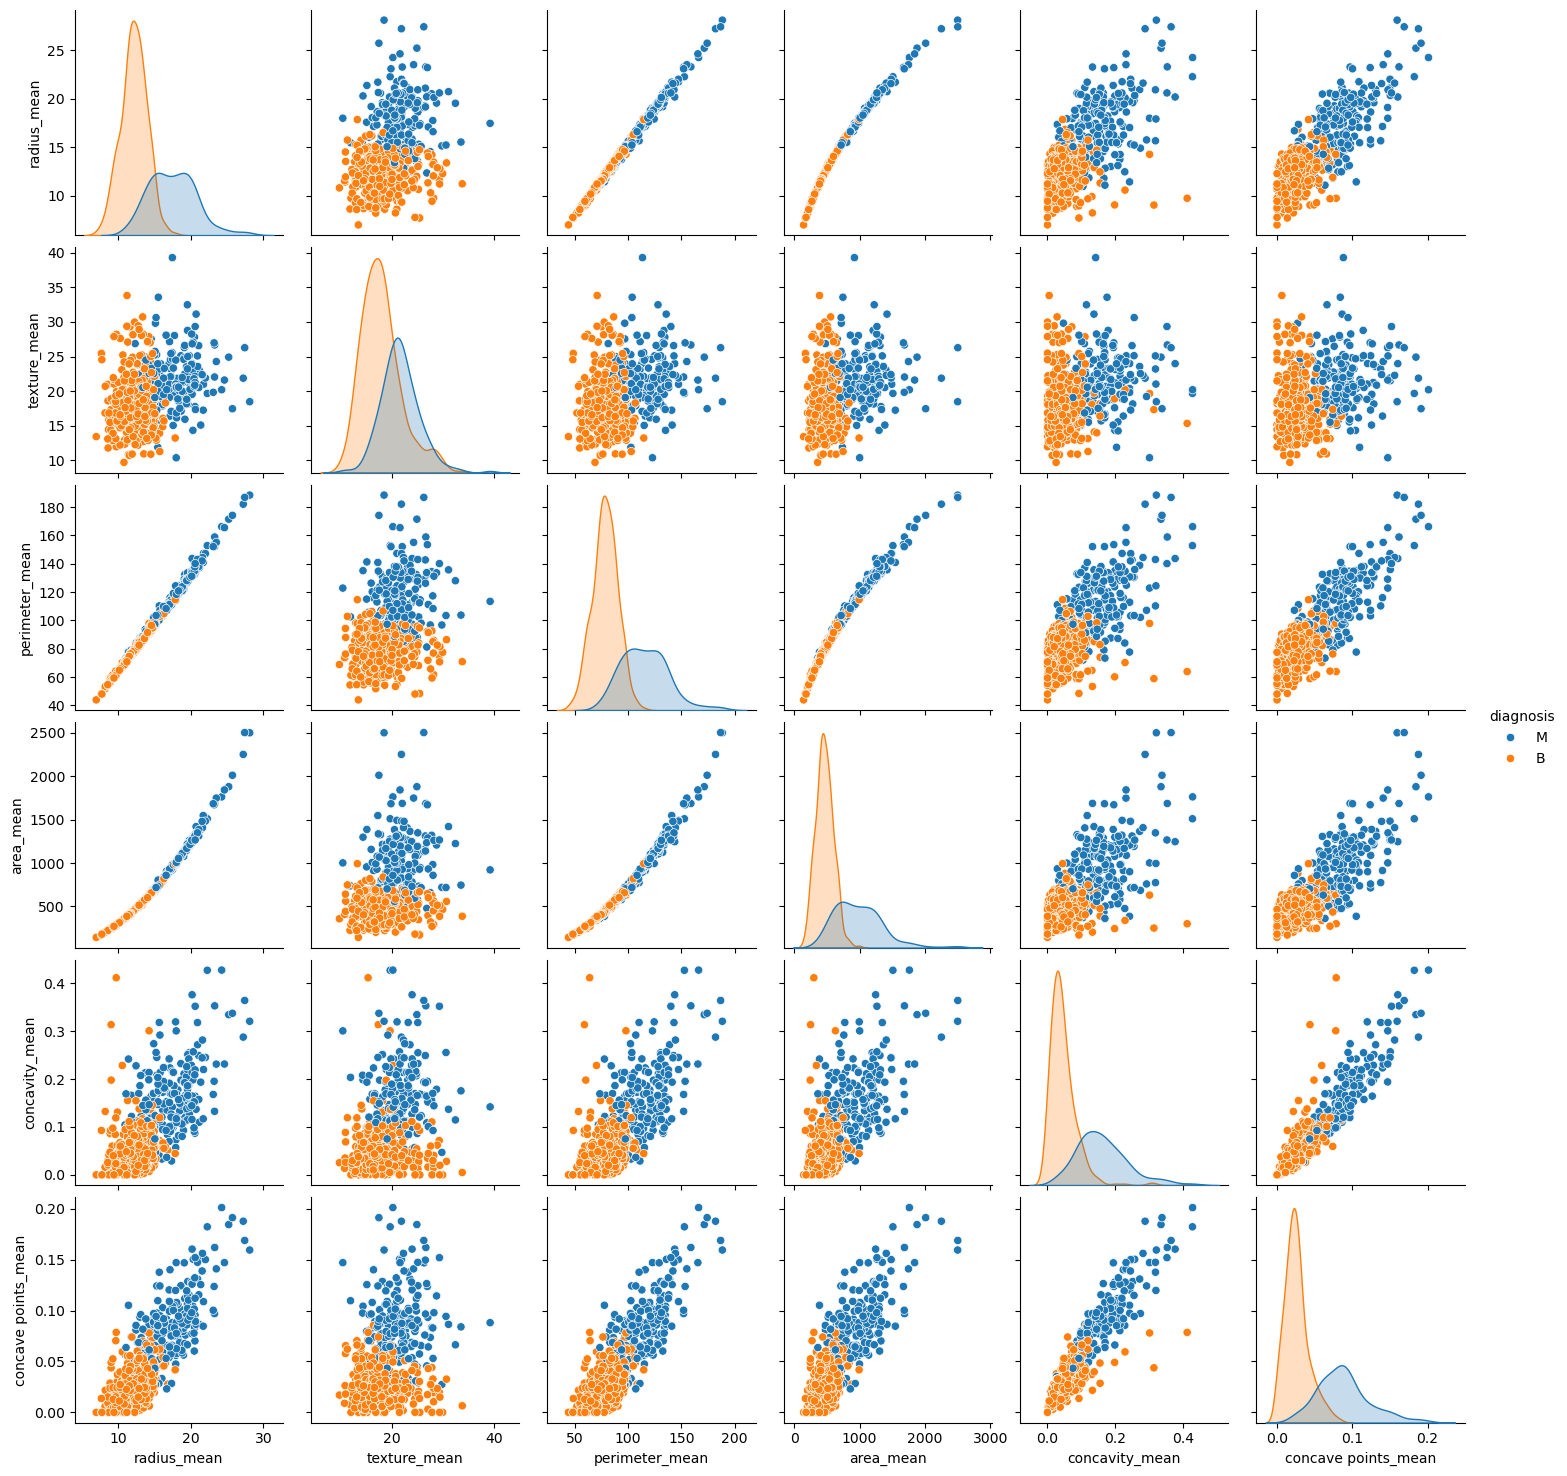

In [244]:
sns.pairplot(df, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',"concavity_mean","concave points_mean"])
plt.show()

In [245]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

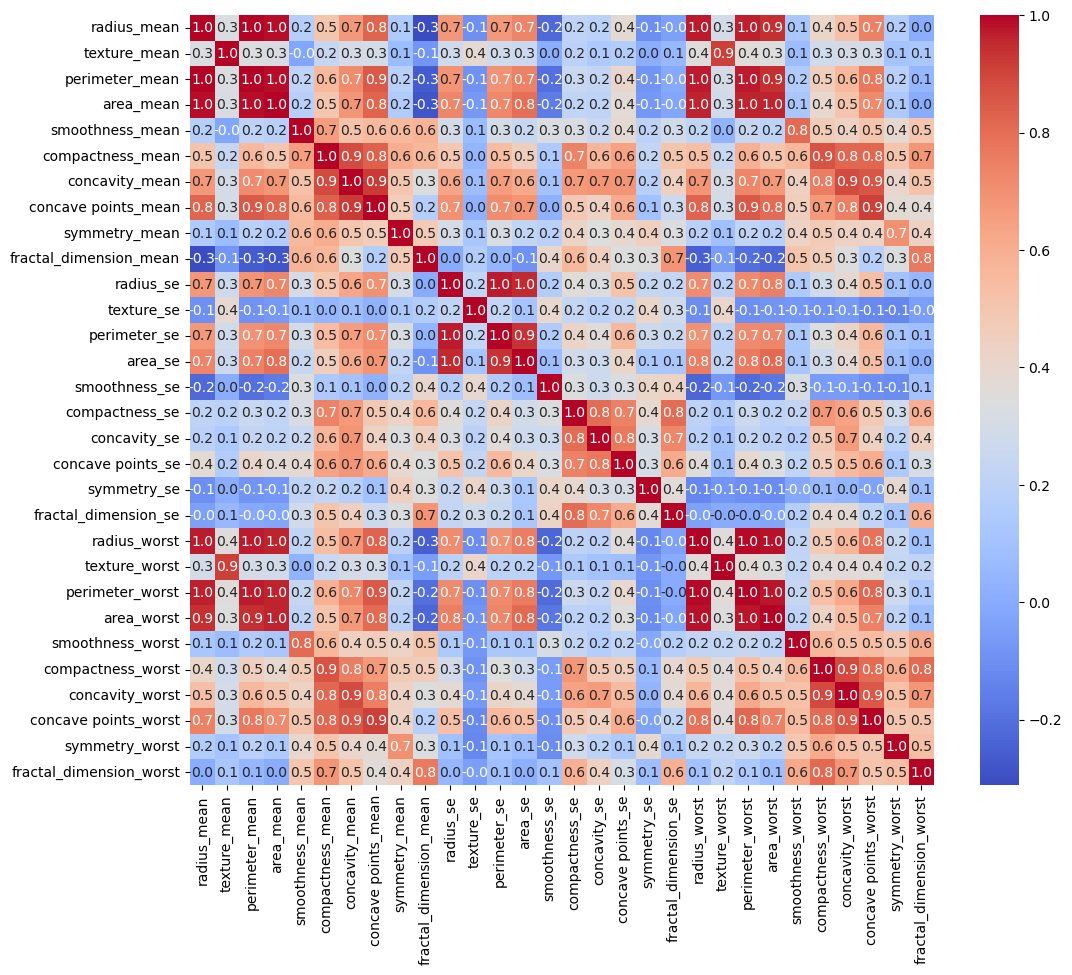

In [246]:
numeric_data=df.select_dtypes(include=["float64"])
plt.figure(figsize=(12, 10))
sns.heatmap(data=numeric_data.corr(),annot=True,cmap="coolwarm",fmt=".1f")
plt.show()

<Figure size 300x300 with 0 Axes>

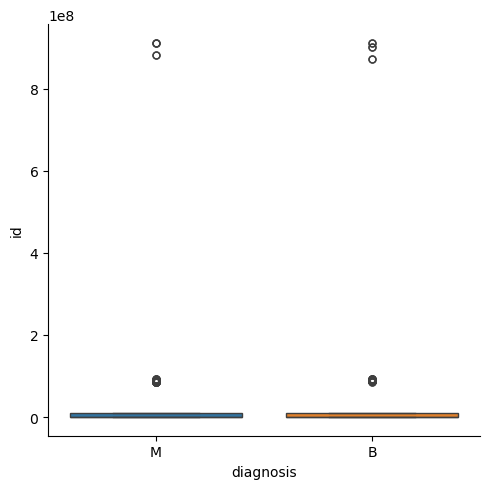

<Figure size 300x300 with 0 Axes>

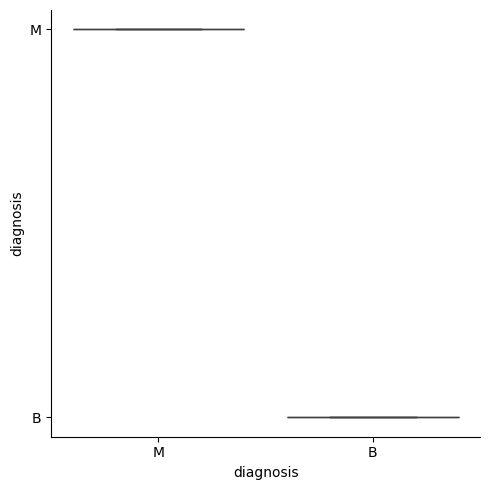

<Figure size 300x300 with 0 Axes>

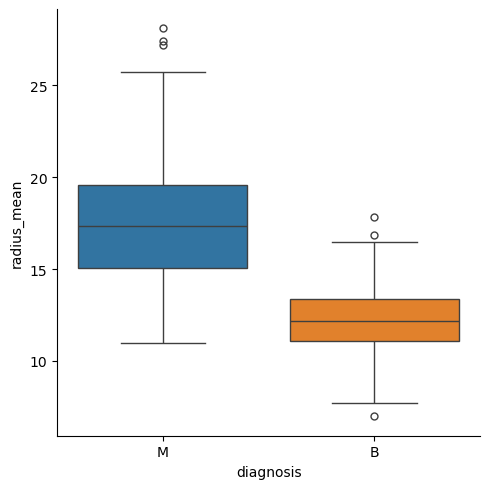

<Figure size 300x300 with 0 Axes>

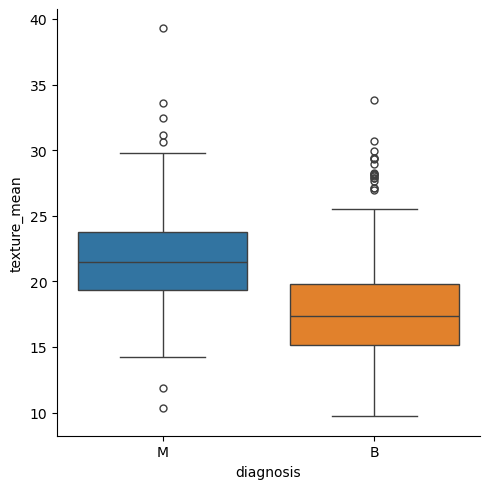

<Figure size 300x300 with 0 Axes>

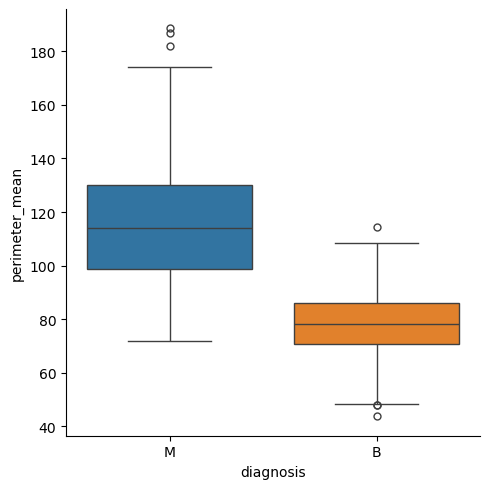

<Figure size 300x300 with 0 Axes>

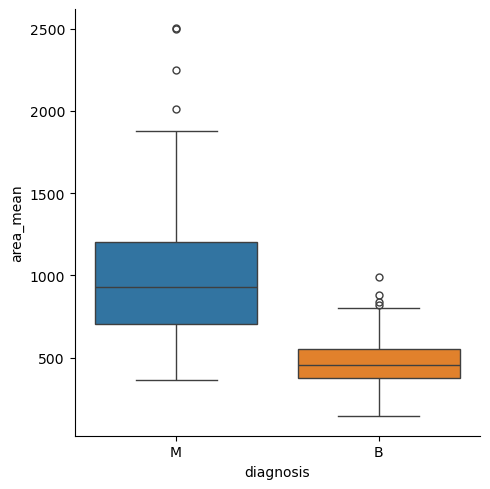

<Figure size 300x300 with 0 Axes>

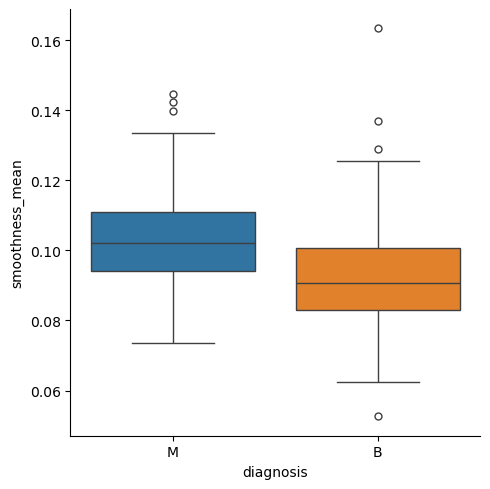

<Figure size 300x300 with 0 Axes>

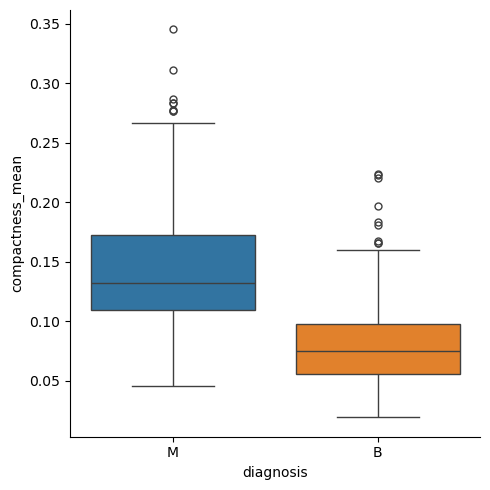

<Figure size 300x300 with 0 Axes>

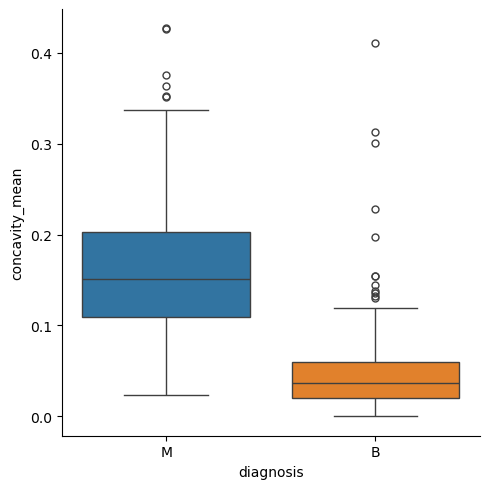

<Figure size 300x300 with 0 Axes>

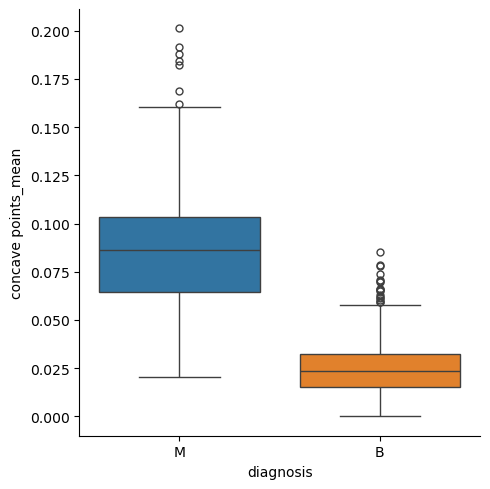

<Figure size 300x300 with 0 Axes>

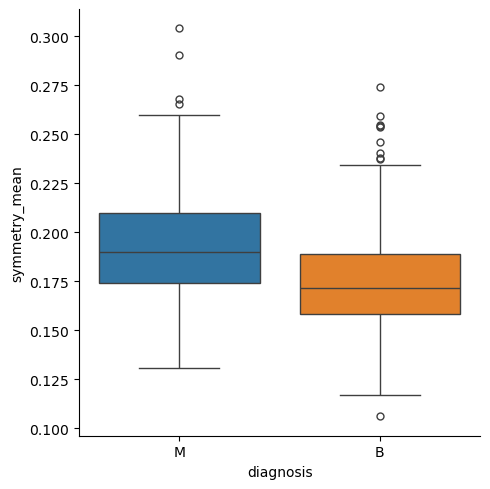

<Figure size 300x300 with 0 Axes>

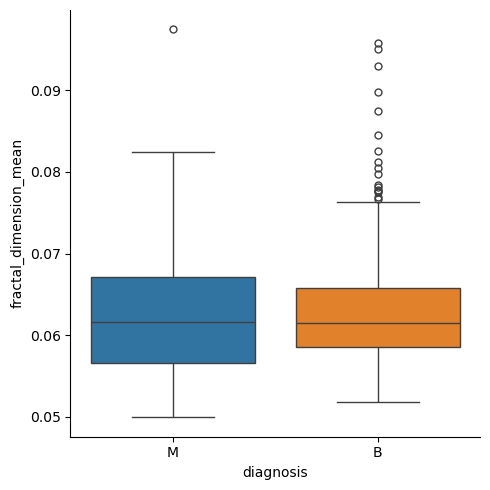

<Figure size 300x300 with 0 Axes>

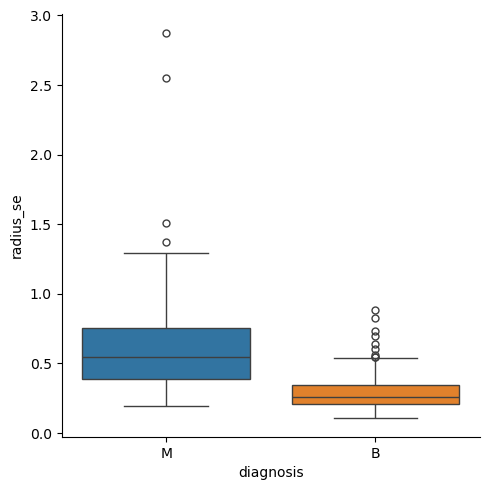

<Figure size 300x300 with 0 Axes>

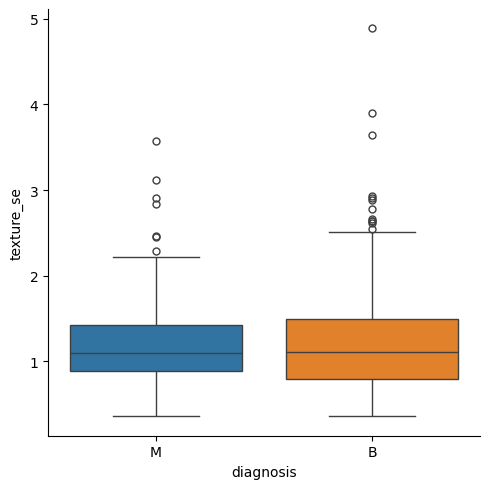

<Figure size 300x300 with 0 Axes>

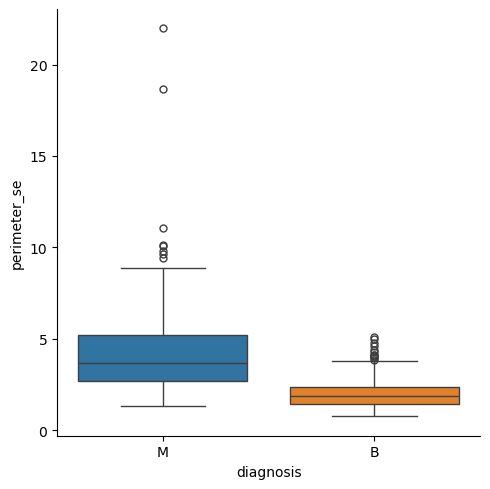

<Figure size 300x300 with 0 Axes>

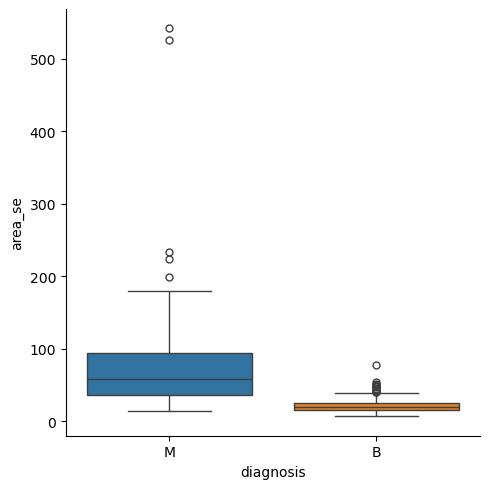

<Figure size 300x300 with 0 Axes>

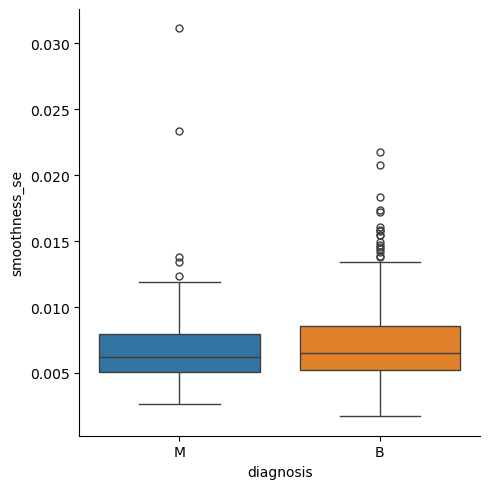

<Figure size 300x300 with 0 Axes>

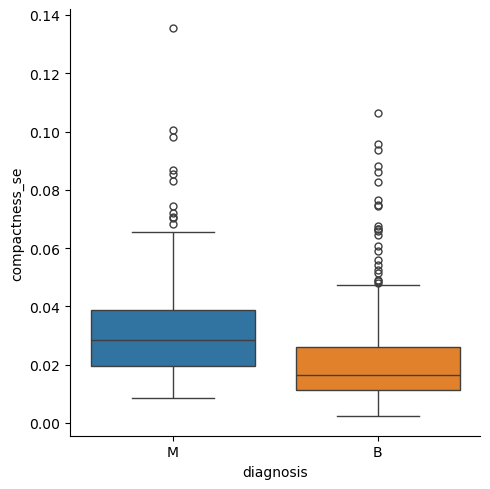

<Figure size 300x300 with 0 Axes>

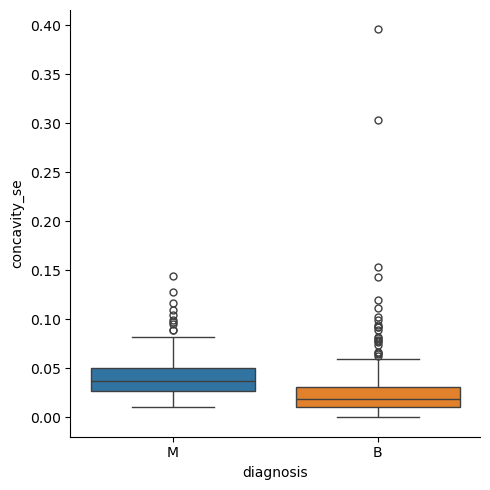

<Figure size 300x300 with 0 Axes>

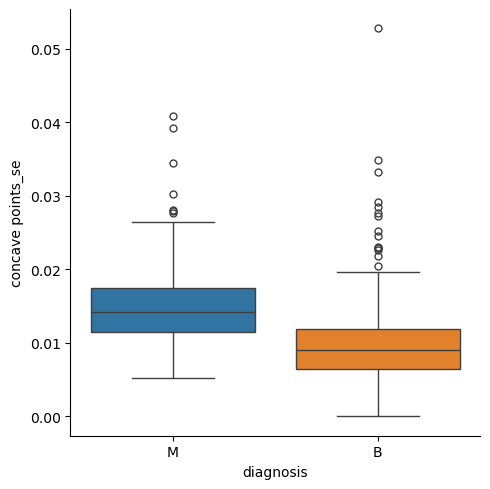

<Figure size 300x300 with 0 Axes>

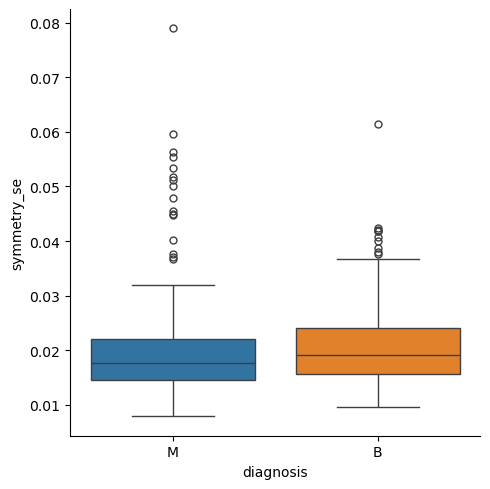

<Figure size 300x300 with 0 Axes>

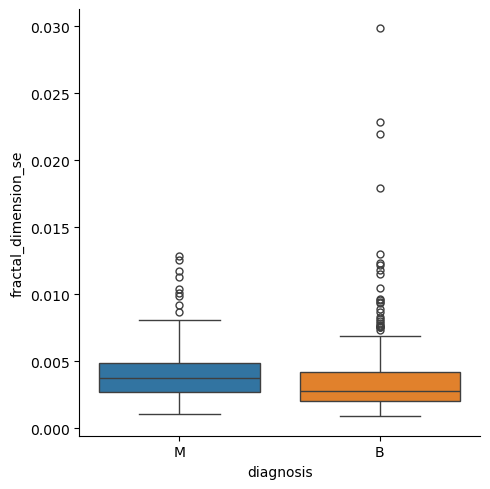

<Figure size 300x300 with 0 Axes>

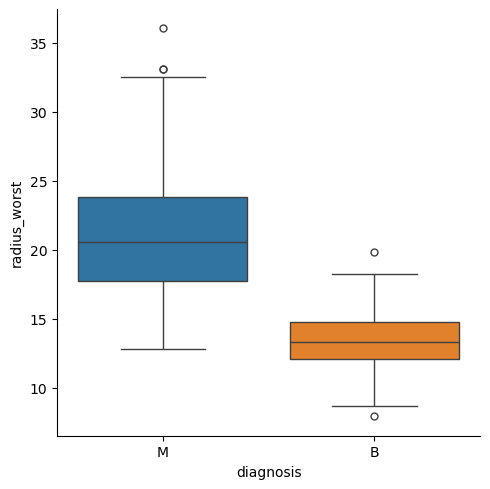

<Figure size 300x300 with 0 Axes>

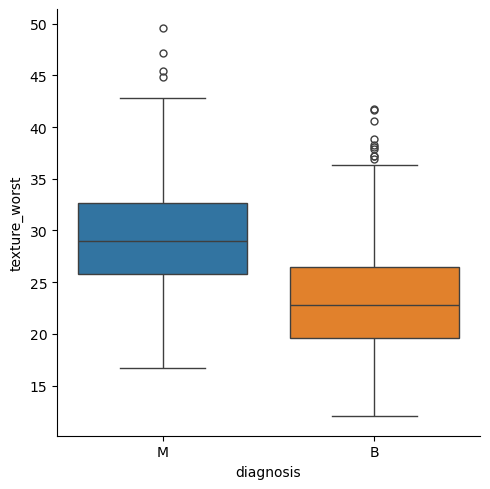

<Figure size 300x300 with 0 Axes>

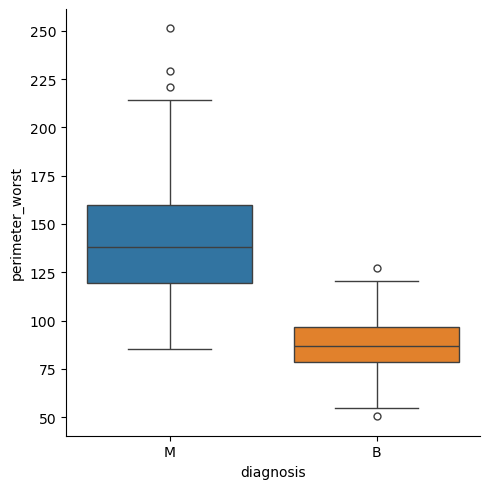

<Figure size 300x300 with 0 Axes>

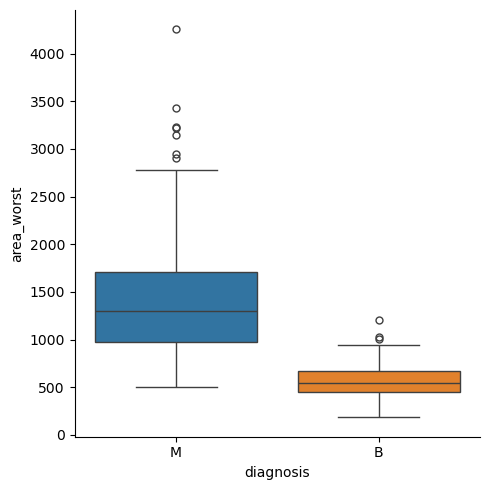

<Figure size 300x300 with 0 Axes>

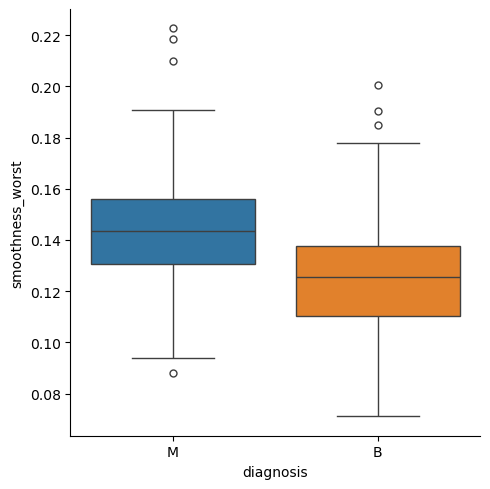

<Figure size 300x300 with 0 Axes>

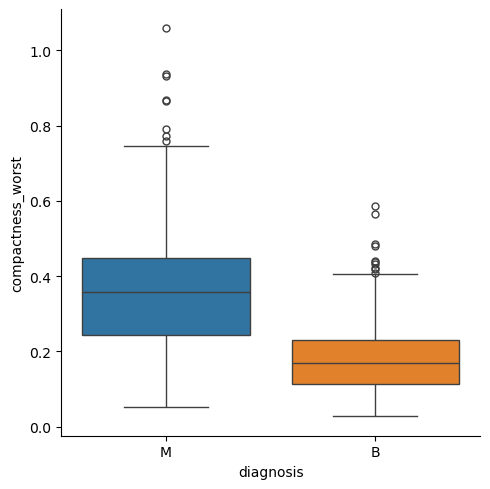

<Figure size 300x300 with 0 Axes>

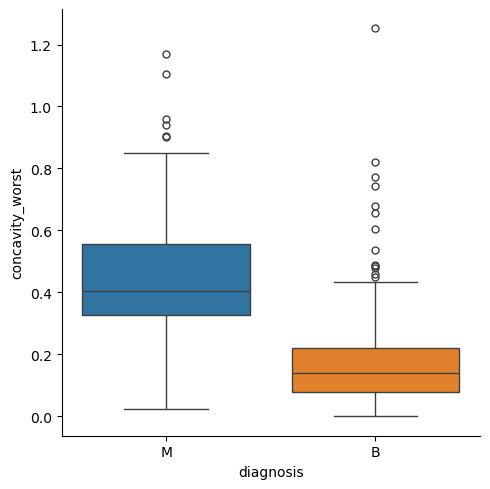

<Figure size 300x300 with 0 Axes>

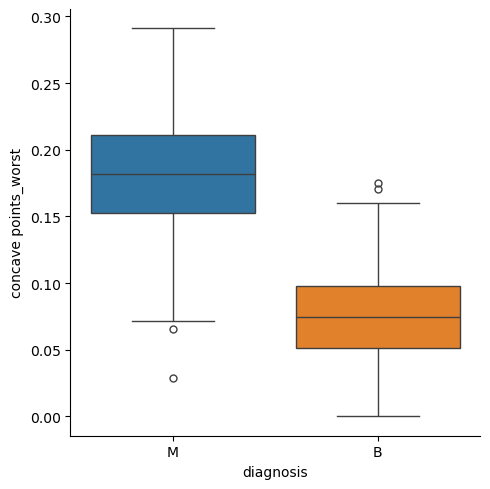

<Figure size 300x300 with 0 Axes>

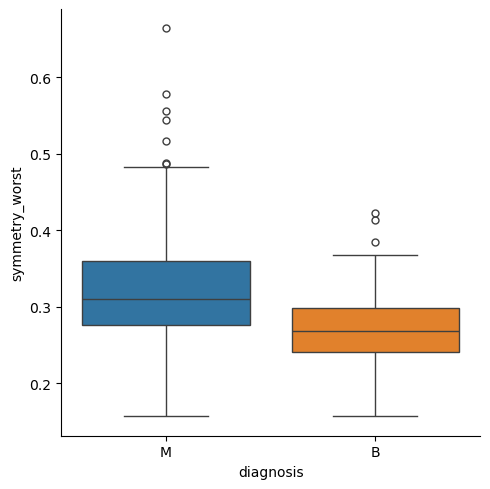

<Figure size 300x300 with 0 Axes>

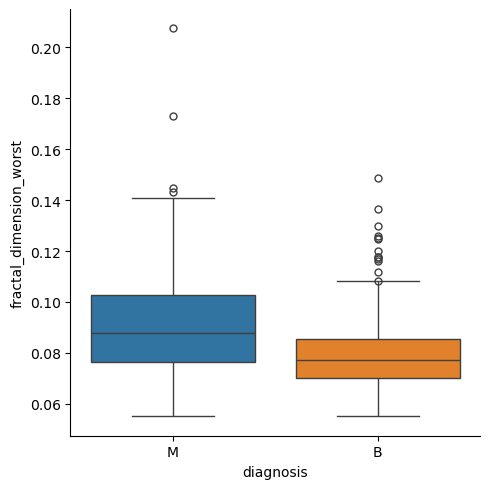

In [247]:
for column in df.columns:
    plt.figure(figsize=(3,3))
    sns.catplot(x="diagnosis", y=column, hue="diagnosis", data=df, kind="box")
    plt.show()

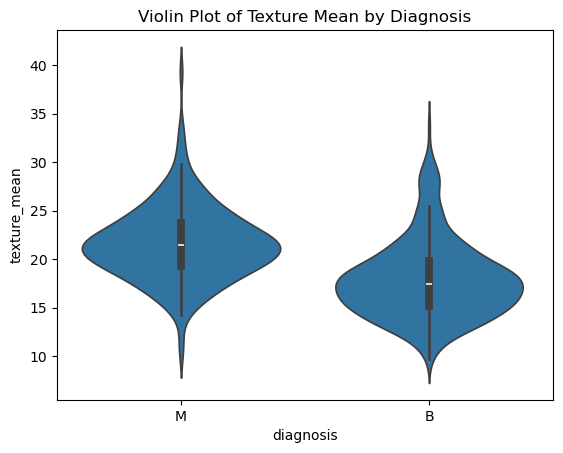

In [248]:
sns.violinplot(x='diagnosis', y='texture_mean', data=df)
plt.title('Violin Plot of Texture Mean by Diagnosis')
plt.show()

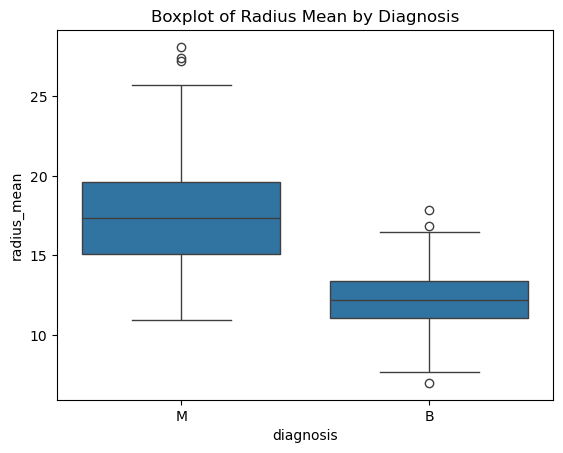

In [249]:
sns.boxplot(x='diagnosis', y='radius_mean', data=df)
plt.title('Boxplot of Radius Mean by Diagnosis')
plt.show()

<Axes: xlabel='perimeter_mean', ylabel='Count'>

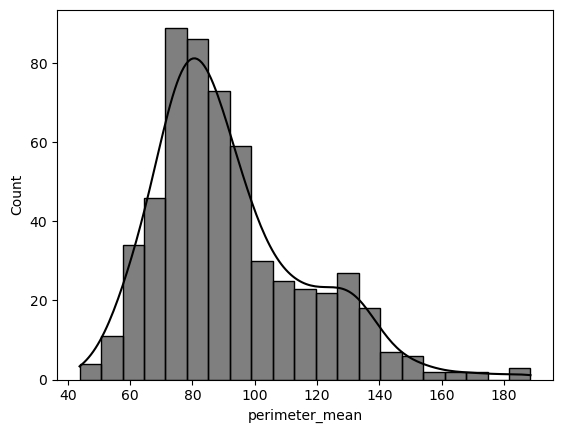

In [250]:
sns.histplot(data=df["perimeter_mean"],kde=True,color="Black")

<Axes: xlabel='area_mean', ylabel='perimeter_mean'>

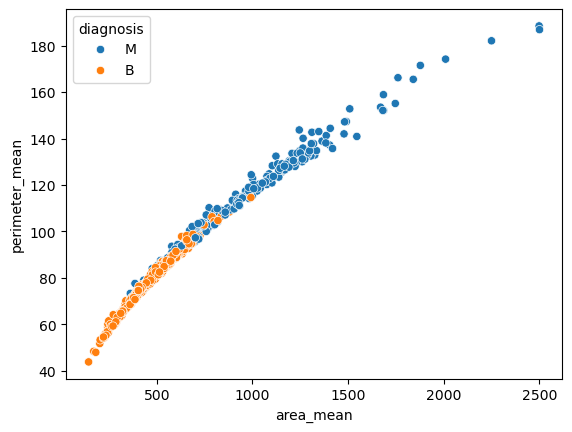

In [251]:
sns.scatterplot(data=df,x="area_mean",y="perimeter_mean",hue="diagnosis")

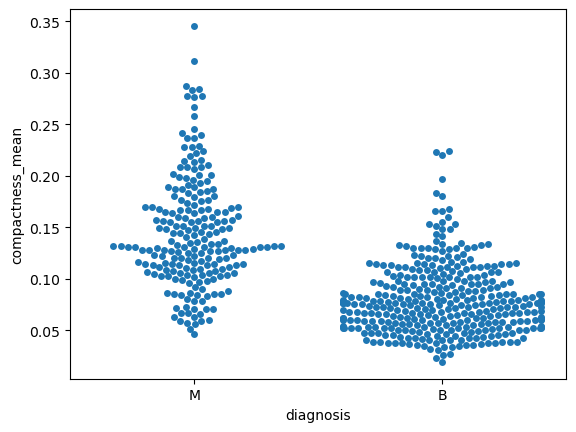

In [252]:
sns.swarmplot(data=df,y="compactness_mean",x="diagnosis")
plt.show()

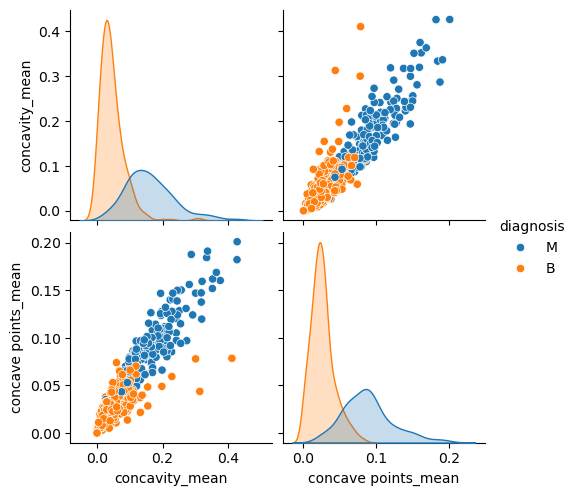

In [253]:
sns.pairplot(data=df,hue="diagnosis",vars=['concavity_mean', 'concave points_mean'])
plt.show()

### PreProccessing-EDA

In [255]:
def outlierDetection(df,features):
    outliers_indexes =[]
    for c in features:
        Q1=np.percentile(df[c],25)
        Q3=np.percentile(df[c],75)
        IQR =Q3-Q1
        outlier_step=IQR*2.5
        outlier_col_list=df[((Q1-outlier_step)>df[c]) |((Q3+outlier_step)<df[c])].index
        outliers_indexes.extend(outlier_col_list)

    outliers_indexes=Counter(outliers_indexes)
    multiple_outliers=list(i for i ,c in outliers_indexes.items() if c>2)

    return multiple_outliers
    


In [256]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [257]:
find_outlier_columns=df.drop(columns=["diagnosis","id"])
find_outlier_columns.head(1)
find_outlier_columns.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [258]:
find_outlier_columns

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [259]:
df.loc[outlierDetection(find_outlier_columns,find_outlier_columns.columns)]
    

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
180,873592,M,27.220,21.87,182.10,2250.0,0.10940,0.19140,0.28710,0.18780,...,33.120,32.85,220.80,3216.0,0.1472,0.4034,0.5340,0.26880,0.2856,0.08082
212,8810703,M,28.110,18.47,188.50,2499.0,0.11420,0.15160,0.32010,0.15950,...,28.110,18.47,188.50,2499.0,0.1142,0.1516,0.3201,0.15950,0.1648,0.05525
461,911296202,M,27.420,26.27,186.90,2501.0,0.10840,0.19880,0.36350,0.16890,...,36.040,31.37,251.20,4254.0,0.1357,0.4256,0.6833,0.26250,0.2641,0.07427
82,8611555,M,25.220,24.91,171.50,1878.0,0.10630,0.26650,0.33390,0.18450,...,30.000,33.62,211.70,2562.0,0.1573,0.6076,0.6476,0.28670,0.2355,0.10510
122,865423,M,24.250,20.20,166.20,1761.0,0.14470,0.28670,0.42680,0.20120,...,26.020,23.99,180.90,2073.0,0.1696,0.4244,0.5803,0.22480,0.3222,0.08009
339,89812,M,23.510,24.27,155.10,1747.0,0.10690,0.12830,0.23080,0.14100,...,30.670,30.73,202.40,2906.0,0.1515,0.2678,0.4819,0.20890,0.2593,0.07738
352,899987,M,25.730,17.46,174.20,2010.0,0.11490,0.23630,0.33680,0.19130,...,33.130,23.58,229.30,3234.0,0.1530,0.5937,0.6451,0.27560,0.3690,0.08815
521,91762702,M,24.630,21.60,165.50,1841.0,0.10300,0.21060,0.23100,0.14710,...,29.920,26.93,205.70,2642.0,0.1342,0.4188,0.4658,0.24750,0.3157,0.09671
504,915186,B,9.268,12.87,61.49,248.7,0.16340,0.22390,0.09730,0.05252,...,10.280,16.38,69.05,300.2,0.1902,0.3441,0.2099,0.10250,0.3038,0.12520
78,8610862,M,20.180,23.97,143.70,1245.0,0.12860,0.34540,0.37540,0.16040,...,23.370,31.72,170.30,1623.0,0.1639,0.6164,0.7681,0.25080,0.5440,0.09964


In [260]:
df=df.drop(outlierDetection(df,find_outlier_columns.columns),axis=0).reset_index(drop=True)

In [261]:
#Outliers according to the new dataset after the deleted values
df.loc[outlierDetection(df,find_outlier_columns.columns)]
    

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
219,88299702,M,23.21,26.97,153.50,1670.0,0.09509,0.16820,0.19500,0.12370,...,31.01,34.51,206.00,2944.0,0.14810,0.41260,0.58200,0.25930,0.3103,0.08677
22,852631,M,17.14,16.40,116.00,912.7,0.11860,0.22760,0.22290,0.14010,...,22.25,21.40,152.40,1461.0,0.15450,0.39490,0.38530,0.25500,0.4066,0.10590
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
35,855133,M,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,...,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504
156,8712766,M,17.47,24.68,116.10,984.6,0.10490,0.16030,0.21590,0.10430,...,23.14,32.33,155.30,1660.0,0.13760,0.38300,0.48900,0.17210,0.2160,0.09300
279,892438,M,19.53,18.90,129.50,1217.0,0.11500,0.16420,0.21970,0.10620,...,25.93,26.24,171.10,2053.0,0.14950,0.41160,0.61210,0.19800,0.2968,0.09929
281,89263202,M,20.09,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,...,23.68,29.43,158.80,1696.0,0.13470,0.33910,0.49320,0.19230,0.3294,0.09469
345,9012000,M,22.01,21.90,147.20,1482.0,0.10630,0.19540,0.24480,0.15010,...,27.66,25.80,195.00,2227.0,0.12940,0.38850,0.47560,0.24320,0.2741,0.08574
534,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.45,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
352,901315,B,10.57,20.22,70.15,338.3,0.09073,0.16600,0.22800,0.05941,...,10.85,22.82,76.51,351.9,0.11430,0.36190,0.60300,0.14650,0.2597,0.12000


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       539 non-null    int64  
 1   diagnosis                539 non-null    object 
 2   radius_mean              539 non-null    float64
 3   texture_mean             539 non-null    float64
 4   perimeter_mean           539 non-null    float64
 5   area_mean                539 non-null    float64
 6   smoothness_mean          539 non-null    float64
 7   compactness_mean         539 non-null    float64
 8   concavity_mean           539 non-null    float64
 9   concave points_mean      539 non-null    float64
 10  symmetry_mean            539 non-null    float64
 11  fractal_dimension_mean   539 non-null    float64
 12  radius_se                539 non-null    float64
 13  texture_se               539 non-null    float64
 14  perimeter_se             5

In [263]:
df.drop("id",inplace=True,axis=1)

### Target  variable encoding

In [265]:
df["diagnosis"]=df["diagnosis"].map({ "B" :0,"M" : 1})

In [266]:
df["diagnosis"].unique()

array([1, 0], dtype=int64)

In [267]:
X=df.drop("diagnosis",axis=1)

In [268]:
y=df["diagnosis"]

In [269]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [270]:
y

0      1
1      1
2      1
3      1
4      1
      ..
534    1
535    1
536    1
537    1
538    0
Name: diagnosis, Length: 539, dtype: int64

### Train-Test Split


In [272]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

### Model Selection

In [274]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

### Hyperparameter Tuning

In [276]:
k_values=range(1,21)
accuracies = []


In [277]:
for value in k_values:
    knn=KNeighborsClassifier(n_neighbors=value)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

    

In [278]:
print(accuracies)

[0.9753086419753086, 0.9938271604938271, 0.9938271604938271, 0.9876543209876543, 0.9814814814814815, 0.9814814814814815, 0.9938271604938271, 0.9753086419753086, 0.9753086419753086, 0.9753086419753086, 0.9753086419753086, 0.9753086419753086, 0.9753086419753086, 0.9753086419753086, 0.9691358024691358, 0.9753086419753086, 0.9753086419753086, 0.9753086419753086, 0.9753086419753086, 0.9753086419753086]


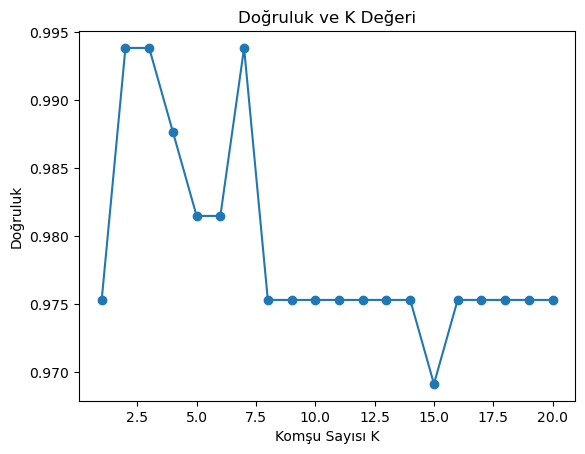

In [279]:
plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Komşu Sayısı K')
plt.ylabel('Doğruluk')
plt.title('Doğruluk ve K Değeri')
plt.show()

In [287]:
max_accuracy = max(accuracies)
max_accuracy

0.9938271604938271

In [291]:
best_k = k_values[accuracies.index(max_accuracy)]
best_k

2

### MODEL WITH MAXIMUM ACCURACY SCORE

In [295]:
knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
acc=accuracy_score(y_test,y_pred)
acc


0.9938271604938271